## SF Evictions

## Data to use

https://data.sfgov.org/Housing-and-Buildings/Eviction-Notices/5cei-gny5/about_data

## Libraries set up


First we import the libraries we will be using and load the csv file and make it a dataframe

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


Once I have the dataset, I will work with it as a pandas dataframe

In [2]:
df = pd.read_csv('Eviction_Notices_20240328.csv', dtype=str)

## Data Exploration and cleaning

I can see the database has 1155 entries, in this case, heritage sites in the world and also contains 15 columns

In [3]:
df.shape

(45510, 47)

Let's look a the columns we have

In [4]:
df.head(30)

Eviction ID                          Address           City State  \
0      M170258         0 Block Of Liebig Street  San Francisco    CA   
1      M131809                              NaN  San Francisco    CA   
2      M060028      11200 Block Of Union Street  San Francisco    CA   
3      M021011      200 Block Of Sherwin Street  San Francisco    CA   
4      M031479        0 Block Of Parkside Drive  San Francisco    CA   
5      E990330   740700 Block Of Sanchez Street  San Francisco    CA   
6      M091234      800 Block Of Red Leaf Court  San Francisco    CA   
7      M151480      3900 Block Of Irving Street  San Francisco    CA   
8      M171833  1300 Block Of Mcallister Street  San Francisco    CA   
9      S000259                300 Block Of 06th  San Francisco    CA   
10     M162740     3300 Block Of Octavia Street  San Francisco    CA   
11     M151037         0 Block Of Madrid Street  San Francisco    CA   
12     M163277         800 Block Of 30th Avenue  San Francisco    CA   
13     M161651     1400 Block Of Shafter Avenue  San Francisco    CA   
14     M132000      1000 Block Of Market Street  San Francisco    CA   
15     M191892       400 Block Of Upper Terrace  San Francisco    CA   
16     M193245     4500 Block Of Mission Street  San Francisco    CA   
17     RE01449         500 Block Of 06th Avenue  San Francisco    CA   
18     M192812         500 Block Of 29th Avenue  San Francisco    CA   
19     M152884         600 Block Of 28th Avenue  San Francisco    CA   
20     M130679         0 Block Of Powers Avenue  San Francisco    CA   
21     M140872       0 Block Of Fair Oak Street  San Francisco    CA   
22     M142441     1000 Block Of Stanyan Street  San Francisco    CA   
23     M171920    800 Block Of Greenwich Street  San Francisco    CA   
24     RE02138       300 Block Of Upper Terrace  San Francisco    CA   
25     M180487     1300 Block Of Shafter Avenue  San Francisco    CA   
26     M150544        500 Block Of Geary Street  San Francisco    CA   
27     S000188  300 Block Of Monterey Boulevard  San Francisco    CA   
28     M192028          0 Block Of Colby Street  San Francisco    CA   
29     M170136         600 Block Of Capp Street  San Francisco    CA   

   Eviction Notice Source Zipcode   File Date Non Payment Breach Nuisance  \
0                           94112  02/09/2017       false  false    false   
1                             941  09/10/2013       false  false     true   
2                           94109  01/09/2006        true  false    false   
3                           94123  08/02/2002       false  false     true   
4                           941??  05/14/2003       false   true    false   
5                           94114  02/19/1999       false   true     true   
6                           94134  10/21/2009       false  false    false   
7                           94122  06/12/2015       false   true    false   
8                           94115  07/25/2017       false  false     true   
9                             NaN  09/09/1997       false  false    false   
10                          94123  09/01/2016       false   true    false   
11                          94112  04/29/2015       false  false    false   
12                          94121  10/18/2016       false  false    false   
13                          94124  05/16/2016       false  false    false   
14                          94103  10/07/2013       false  false    false   
15                          94117  08/05/2019       false  false    false   
16                          94112  12/16/2019       false  false     true   
17                          94118  03/17/1997       false   true    false   
18                          94121  10/03/2019       false  false    false   
19                          94121  10/26/2015       false  false    false   
20                          94110  04/12/2013       false  false    false   
21                          94110  04/23/2014       false  false     true   

In [5]:
df.columns

Index(['Eviction ID', 'Address', 'City', 'State',
       'Eviction Notice Source Zipcode', 'File Date', 'Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 'Other Cause',
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends', 'Constraints Date', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Location', 'Shape',
       'data_as_of', 'data_loaded_at', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods', 'DELETE - Neighborhoods',
       'DELETE - Police Districts', 'DELETE - Supervisor Districts',
       'DELETE - Fire Prevention Districts', 'DELETE - Zip Codes',
       'CBD, BID and GBD Boundaries as of 2017',
       'Central Ma

Some columns seem less useful - let's delete them.

In [6]:
df=df.drop('DELETE - Fire Prevention Districts',axis=1)
df=df.drop('DELETE - Police Districts',axis=1)
df=df.drop('DELETE - Zip Codes',axis=1)
df=df.drop('DELETE - Supervisor Districts',axis=1)

I wonder what neighborhoods look like

In [7]:
df['Neighborhoods - Analysis Boundaries'].unique()

array([nan, 'Sunset/Parkside', 'Western Addition', 'Inner Richmond',
       'Marina', 'Excelsior', 'Outer Richmond', 'Bayview Hunters Point',
       'South of Market', 'Haight Ashbury', 'Outer Mission',
       'Bernal Heights', 'Mission', 'Russian Hill', 'Tenderloin',
       'West of Twin Peaks', 'Portola', 'Financial District/South Beach',
       'Chinatown', 'Inner Sunset', 'Visitacion Valley',
       'Pacific Heights', 'Nob Hill', 'Lakeshore',
       'Oceanview/Merced/Ingleside', 'Noe Valley', 'Presidio Heights',
       'Twin Peaks', 'Hayes Valley', 'Castro/Upper Market', 'North Beach',
       'Potrero Hill', 'Lone Mountain/USF', 'Japantown', 'Glen Park',
       'Treasure Island', 'Seacliff', 'Mission Bay', 'Lincoln Park',
       'Presidio', 'Golden Gate Park', 'McLaren Park'], dtype=object)

This is also interesting - source of evictions

In [8]:
df['Eviction Notice Source Zipcode'].unique()

array(['94112', '941', '94109', '94123', '941??', '94114', '94134',
       '94122', '94115', nan, '94121', '94124', '94103', '94117', '94118',
       '94110', '94133', '94102', '94131', '94108', '94105', '94132',
       '94116', '94127', '94107', '9411', '94111', '94104', '94', '94130',
       '94158', '9', '94142', '9412', '9410', '94144', '91011', '94015',
       '95103', '94129', '9413', '94113', '94080', '24109', '95134',
       '94126', '94177', '94609', '941 1', '92124', '94101', '94159',
       '94135'], dtype=object)

The first obvious question that comes to mind is: Who's thinking about the people in Nob Hill?

In [9]:
nob_hill = df[df['Neighborhoods - Analysis Boundaries']=='Nob Hill']

In [37]:
nob_hill["Location"]


45       (37.790265262, -122.408389146)
55       (37.792059517, -122.416947427)
69       (37.787277155, -122.416825198)
80       (37.793382004, -122.413660629)
89        (37.791201169, -122.40852925)
                      ...              
45398    (37.789791451, -122.411243473)
45427    (37.788438843, -122.414352342)
45442    (37.789064182, -122.417846924)
45466     (37.79608048, -122.413832668)
45476    (37.787915709, -122.419301486)
Name: Location, Length: 1659, dtype: object

In [10]:
eviction_causes = [
    'Non Payment', 
    'Breach',
    'Nuisance', 
    'Illegal Use', 
    'Failure to Sign Renewal', 
    'Access Denial',
    'Unapproved Subtenant', 
    'Owner Move In', 'Demolition',
    'Capital Improvement', 
    'Substantial Rehab', 
    'Ellis Act WithDrawal',
    'Condo Conversion', 
    'Roommate Same Unit', 
    'Other Cause',
    'Late Payments', 
    'Lead Remediation', 
    'Development',
    'Good Samaritan Ends',
]

neighborhoods = ['Sunset/Parkside', 'Western Addition', 'Inner Richmond',
       'Marina', 'Excelsior', 'Outer Richmond', 'Bayview Hunters Point',
       'South of Market', 'Haight Ashbury', 'Outer Mission',
       'Bernal Heights', 'Mission', 'Russian Hill', 'Tenderloin',
       'West of Twin Peaks', 'Portola', 'Financial District/South Beach',
       'Chinatown', 'Inner Sunset', 'Visitacion Valley',
       'Pacific Heights', 'Nob Hill', 'Lakeshore',
       'Oceanview/Merced/Ingleside', 'Noe Valley', 'Presidio Heights',
       'Twin Peaks', 'Hayes Valley', 'Castro/Upper Market', 'North Beach',
       'Potrero Hill', 'Lone Mountain/USF', 'Japantown', 'Glen Park',
       'Treasure Island', 'Seacliff', 'Mission Bay', 'Lincoln Park',
       'Presidio', 'Golden Gate Park', 'McLaren Park']

In [11]:
for neighborhood in sorted(neighborhoods):
    neighborhood_df = df[df['Neighborhoods - Analysis Boundaries'] == neighborhood]
    neighborhood_evictions = len(neighborhood_df)
    print(neighborhood.upper()+f" - {neighborhood_evictions} evictions requests")
    for cause in eviction_causes:
        qty = len(neighborhood_df[neighborhood_df[cause]=="true"])
        print(f"\t{qty} {cause} Evictions - {qty/neighborhood_evictions*100:.1f}%")

BAYVIEW HUNTERS POINT - 1396 evictions requests
	202 Non Payment Evictions - 14.5%
	292 Breach Evictions - 20.9%
	231 Nuisance Evictions - 16.5%
	33 Illegal Use Evictions - 2.4%
	12 Failure to Sign Renewal Evictions - 0.9%
	41 Access Denial Evictions - 2.9%
	23 Unapproved Subtenant Evictions - 1.6%
	308 Owner Move In Evictions - 22.1%
	35 Demolition Evictions - 2.5%
	19 Capital Improvement Evictions - 1.4%
	0 Substantial Rehab Evictions - 0.0%
	34 Ellis Act WithDrawal Evictions - 2.4%
	0 Condo Conversion Evictions - 0.0%
	48 Roommate Same Unit Evictions - 3.4%
	125 Other Cause Evictions - 9.0%
	69 Late Payments Evictions - 4.9%
	0 Lead Remediation Evictions - 0.0%
	0 Development Evictions - 0.0%
	0 Good Samaritan Ends Evictions - 0.0%
BERNAL HEIGHTS - 1330 evictions requests
	69 Non Payment Evictions - 5.2%
	177 Breach Evictions - 13.3%
	149 Nuisance Evictions - 11.2%
	27 Illegal Use Evictions - 2.0%
	1 Failure to Sign Renewal Evictions - 0.1%
	10 Access Denial Evictions - 0.8%
	15 Una

In [29]:
owner_zips = ['94112',
 '941',
 '94109',
 '94123',
 '941??',
 '94114',
 '94134',
 '94122',
 '94115',
 '94121',
 '94124',
 '94103',
 '94117',
 '94118',
 '94110',
 '94133',
 '94102',
 '94131',
 '94108',
 '94105',
 '94132',
 '94116',
 '94127',
 '94107',
 '9411',
 '94111',
 '94104',
 '94',
 '94130',
 '94158',
 '9',
 '94142',
 '9412',
 '9410',
 '94144',
 '91011',
 '94015',
 '95103',
 '94129',
 '9413',
 '94113',
 '94080',
 '24109',
 '95134',
 '94126',
 '94177',
 '94609',
 '941 1',
 '92124',
 '94101',
 '94159',
 '94135']

In [35]:
for zip_code in sorted(owner_zips):
    evicter_df = df[df['Eviction Notice Source Zipcode'] == zip_code]
    initiations = len(evicter_df)
    if initiations < 2000:
        continue
    print(zip_code+f" - {initiations} evictions requests")
    for cause in eviction_causes:
        qty = len(evicter_df[evicter_df[cause]=="true"])
        print(f"\t{qty} {cause} Evictions - {qty/initiations*100:.1f}%")

94102 - 2956 evictions requests
	283 Non Payment Evictions - 9.6%
	809 Breach Evictions - 27.4%
	1198 Nuisance Evictions - 40.5%
	67 Illegal Use Evictions - 2.3%
	2 Failure to Sign Renewal Evictions - 0.1%
	25 Access Denial Evictions - 0.8%
	30 Unapproved Subtenant Evictions - 1.0%
	123 Owner Move In Evictions - 4.2%
	30 Demolition Evictions - 1.0%
	246 Capital Improvement Evictions - 8.3%
	8 Substantial Rehab Evictions - 0.3%
	48 Ellis Act WithDrawal Evictions - 1.6%
	6 Condo Conversion Evictions - 0.2%
	16 Roommate Same Unit Evictions - 0.5%
	69 Other Cause Evictions - 2.3%
	102 Late Payments Evictions - 3.5%
	2 Lead Remediation Evictions - 0.1%
	23 Development Evictions - 0.8%
	0 Good Samaritan Ends Evictions - 0.0%
94103 - 2888 evictions requests
	169 Non Payment Evictions - 5.9%
	611 Breach Evictions - 21.2%
	932 Nuisance Evictions - 32.3%
	67 Illegal Use Evictions - 2.3%
	2 Failure to Sign Renewal Evictions - 0.1%
	14 Access Denial Evictions - 0.5%
	46 Unapproved Subtenant Evicti

In [72]:
def eviction_reason(eviction):
    for cause in eviction_causes:
        if eviction[cause] == "true":
            return cause
    return "Capitalism"
    
for index, row in nob_hill.iterrows():
    date = row["File Date"]
    print(date, end="\t")
    address = row["Address"]
    print(address)
    reason = eviction_reason(row)
    print(reason)
    location = row["Location"]
    print(location)
    print("-"*80)

10/21/2013	600 Block Of Bush Street
Breach
(37.790265262, -122.408389146)
--------------------------------------------------------------------------------
09/28/2016	1400 Block Of Sacramento Street
Capital Improvement
(37.792059517, -122.416947427)
--------------------------------------------------------------------------------
01/14/2015	900 Block Of Post Street
Nuisance
(37.787277155, -122.416825198)
--------------------------------------------------------------------------------
03/25/1997	1200 Block Of Clay Street
Owner Move In
(37.793382004, -122.413660629)
--------------------------------------------------------------------------------
07/19/2013	700 Block Of Pine Street
Breach
(37.791201169, -122.40852925)
--------------------------------------------------------------------------------
12/30/1997	1200 Block Of Pine Street
Owner Move In
(37.790203959, -122.416392889)
--------------------------------------------------------------------------------
09/01/2017	1600 Block Of Sacramen

In [98]:
# create a df for visualizing
vis_df = df
vis_df["Cause"] = vis_df.apply(lambda row: eviction_reason(row), axis=1)

# Keep ID, Date, Address, Cause, Location
vis_df = vis_df[[
    "Eviction ID",
    "Address",
    "File Date",
    "Cause",
    "Location",
]]
lat_long = vis_df['Location'].str.strip('()') \
                 .str.split(', ', expand=True) \
                 .rename(columns={0:'Latitude', 1:'Longitude'})
vis_df.loc[:, "Latitude"] = lat_long["Latitude"].apply(lambda lat: float(lat))
vis_df.loc[:, "Longitude"] = lat_long["Longitude"].apply(lambda lon: float(lon))

vis_df

/tmp/ipykernel_9511/1227092160.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9511/1227092160.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Eviction ID                         Address   File Date  \
0         M170258        0 Block Of Liebig Street  02/09/2017   
1         M131809                             NaN  09/10/2013   
2         M060028     11200 Block Of Union Street  01/09/2006   
3         M021011     200 Block Of Sherwin Street  08/02/2002   
4         M031479       0 Block Of Parkside Drive  05/14/2003   
...           ...                             ...         ...   
45505     M021100  900 Block Of Divisadero Street  08/19/2002   
45506     E991948        400 Block Of Pine Street  10/04/1999   
45507     E991869   2400 Block Of Harrison Street  09/24/1999   
45508     E980111     200 Block Of Precita Avenue  01/14/1998   
45509     E990492      2200 Block Of Beach Street  03/19/1999   

                      Cause                        Location   Latitude  \
0               Other Cause  (37.708091605, -122.455648469)  37.708092   
1                  Nuisance                             NaN        NaN   
2               Non Payment                             NaN        NaN   
3                  Nuisance                             NaN        NaN   
4                    Breach                             NaN        NaN   
...                     ...                             ...        ...   
45505    Roommate Same Unit  (37.778277757, -122.438339177)  37.778278   
45506  Ellis Act WithDrawal  (37.791762721, -122.403209139)  37.791763   
45507            Demolition  (37.758224677, -122.412493469)  37.758225   
45508         Late Payments  (37.747211009, -122.414215877)  37.747211   
45509                Breach  (37.803442579, -122.446101214)  37.803443   

        Longitude  
0     -122.455648  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
45505 -122.438339  
45506 -122.403209  
45507 -122.412493  
45508 -122.414216  
45509 -122.446101  

[45510 rows x 7 columns]

In [99]:
vis_df=vis_df.drop('Location',axis=1)

In [100]:
vis_df = vis_df.dropna()
vis_df

Eviction ID                          Address   File Date  \
0         M170258         0 Block Of Liebig Street  02/09/2017   
6         M091234      800 Block Of Red Leaf Court  10/21/2009   
7         M151480      3900 Block Of Irving Street  06/12/2015   
8         M171833  1300 Block Of Mcallister Street  07/25/2017   
9         S000259                300 Block Of 06th  09/09/1997   
...           ...                              ...         ...   
45505     M021100   900 Block Of Divisadero Street  08/19/2002   
45506     E991948         400 Block Of Pine Street  10/04/1999   
45507     E991869    2400 Block Of Harrison Street  09/24/1999   
45508     E980111      200 Block Of Precita Avenue  01/14/1998   
45509     E990492       2200 Block Of Beach Street  03/19/1999   

                      Cause   Latitude   Longitude  
0               Other Cause  37.708092 -122.455648  
6               Other Cause  37.708252 -122.426851  
7                    Breach  37.762601 -122.500167  
8                  Nuisance  37.778372 -122.434241  
9                Demolition  37.781976 -122.464421  
...                     ...        ...         ...  
45505    Roommate Same Unit  37.778278 -122.438339  
45506  Ellis Act WithDrawal  37.791763 -122.403209  
45507            Demolition  37.758225 -122.412493  
45508         Late Payments  37.747211 -122.414216  
45509                Breach  37.803443 -122.446101  

[45442 rows x 6 columns]

In [101]:
df_plot_tmp.head()

device_id gender  age age_cate            timestamp  longitude  \
0  2820430946322886294      M   21     A22-  2016-05-03 12:58:58     108.81   
1  4546116091280128285      M   22     A22-  2016-05-05 18:21:11     110.23   
2  7849111383031438568      M   34   A32-40  2016-05-03 19:51:30     123.49   
3 -1762697191251584400      M   30   A29-31  2016-05-05 14:04:28     114.00   
4  4750870437766392528      M   27   A27-28  2016-05-06 00:44:49     106.52   

   latitude  hour  lon_jitter  lat_jitter  size_for_plot  hour_oct  
0     23.07    12  108.809717   23.071873              1         4  
1     20.04    18  110.235122   20.041807              1         6  
2     41.71    19  123.491060   41.714264              1         6  
3     22.67    14  113.999172   22.670077              1         4  
4     29.51     0  106.520306   29.512754              1         0

/tmp/ipykernel_9511/3493059914.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9511/3493059914.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



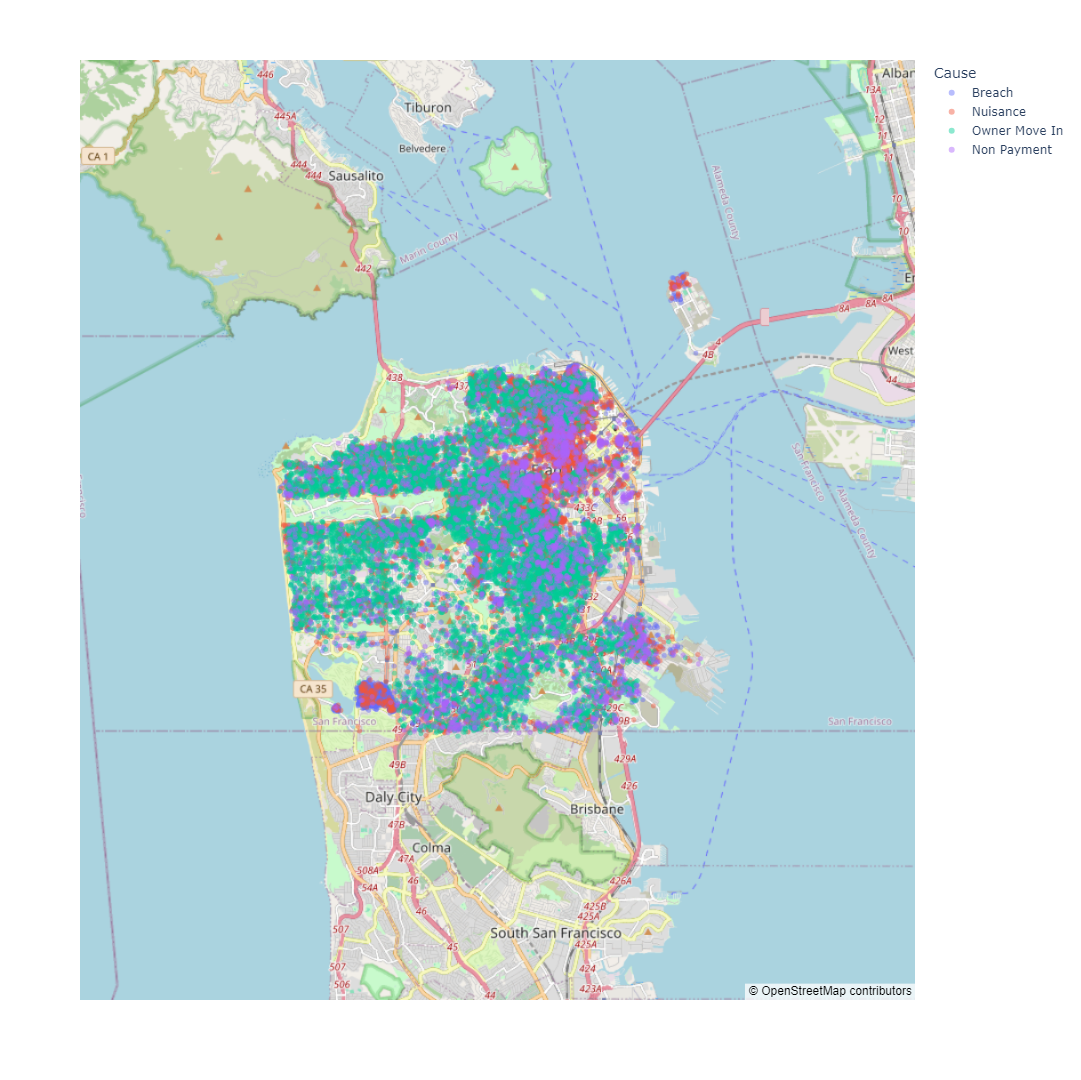

In [163]:
target_causes = [
    "Nuisance",
    "Breach",
    "Owner Move In",
    "Non Payment"
]
focus_df = vis_df[vis_df["Cause"].isin(target_causes)]
# Apply slight jitter to each lat, lon

sigma = 0.0005
focus_df["Longitude Jittered"] = focus_df["Longitude"].apply(lambda x: np.random.normal(x, sigma))
focus_df["Latitude Jittered"] = focus_df["Latitude"].apply(lambda x: np.random.normal(x, sigma))

fig = px.scatter_mapbox(
    focus_df, 
    lat="Latitude Jittered", 
    lon="Longitude Jittered", 
    color="Cause", 
    zoom=11, 
    mapbox_style='open-street-map',
    opacity=0.45,
    width=1080, 
    height=1080
)
fig.show()

In [134]:
focus_df["Longitude"]

7       -122.500167
8       -122.434241
10      -122.429882
12      -122.489679
16      -122.434263
            ...    
45501   -122.434045
45502   -122.425846
45503   -122.410063
45504   -122.406746
45509   -122.446101
Name: Longitude, Length: 31300, dtype: float64

7       -122.482341
8       -122.422253
10      -122.335809
12      -122.388333
16      -122.348037
            ...    
45501   -122.348345
45502   -122.442574
45503   -122.373102
45504   -122.472211
45509   -122.396417
Name: Longitude, Length: 31300, dtype: float64